

# Project: Investigate a Dataset (TMDB-movies ratings)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>


</ul>

<a id='intro'></a>
## Introduction

I chose TMDB-movies rating as i am a movie watcher myself .to get inights about movies to watch and about the companies working hard to film it

.I plan to analyze the budget of the movies .to know the highest budget  -does high budget relate to revenue ,runtime or popularity.
and what is the most used genre in movies  , - the top 10 productive companies  ,- the top productive company budget to revene ratio

In [1]:
# importing important libraries
%matplotlib inline
import pandas as pd 
from matplotlib import pyplot as plt 
import operator
import itertools
import numpy as np

<a id='wrangling'></a>
## Data Wrangling




In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv(r'tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


1-We need to delete unrelated columns that slows our  code time

2- we need to handle missing values by deleting or replacing it

3-we need to delete duplicates

4- unrelated to the question asked (we need to organize production companies , genres ,cast for extra analysis)

In [3]:
# problem 1  deleting unrelated columns
df=df.drop(columns=['homepage','overview','tagline','keywords'])

# problem 2  we only deleted the directors missing value as it had low count and wont mess our data
df['imdb_id'].fillna('0',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['genres'].fillna('Unknown',inplace=True)
df['production_companies'].fillna('Unknown',inplace=True)
df.dropna(inplace=True)

#problem 3  deleting duplicaes
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [4]:
# a function to clean the columns to get the count of every unique value
def cleaning_some_columns(column) :
    # converting series to list 
    llist=list(column)
    full_units_of_the_column=[]
    ddi={}
    # splitting rows with the | separator to multiple rows and adding everting to a list
    for i in range(len(llist)):
        if '|' in column[i]:
            for c in column[i].split('|'):
                full_units_of_the_column.append(c)
        else:
            full_units_of_the_column.append(column[i])
    # converting to a set and adding everyrhing to a dictionary to ease making charts        
    for i in list(set(full_units_of_the_column)):
        ddi[i]=full_units_of_the_column.count(i)
    ddi=dict(sorted(ddi.items(),key=operator.itemgetter(1),reverse=True))    
    return ddi


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (some statistical info for the budget)

In [5]:
#getting statistical info about budget
df['budget'].describe().astype(int)


count        10821
mean      14682588
std       30963451
min              0
25%              0
50%              0
75%       15000000
max      425000000
Name: budget, dtype: int32

getting the max,min and average of the budget 

### Research Question 2  (does the revenue or run time or popularity or vote_count relate to the budget)

[Text(0.5, 1.0, 'budget to runtime'),
 Text(0.5, 0, 'budget'),
 Text(0, 0.5, 'runtime')]

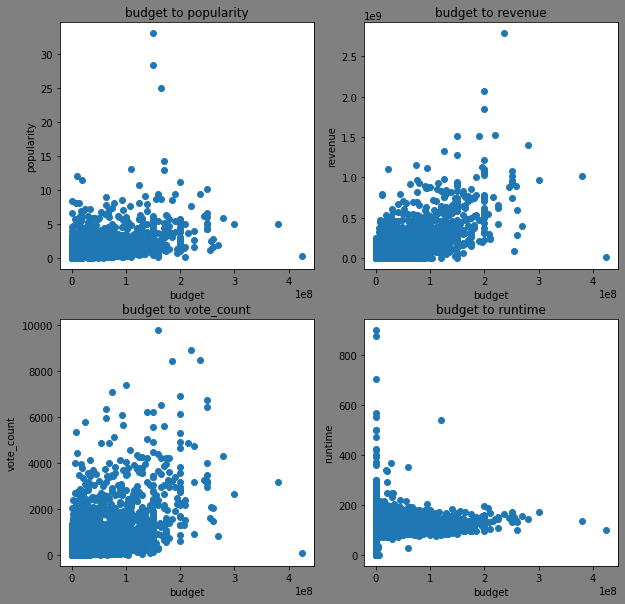

In [6]:
# comparing the relation of the budget with other columns
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
fig.patch.set_facecolor('grey')
axes[0,0].scatter(df['budget'],df['popularity'])
axes[0,0].set(title='budget to popularity',xlabel='budget',ylabel='popularity')
axes[0,1].scatter(df['budget'],df['revenue'])
axes[0,1].set(title='budget to revenue',xlabel='budget',ylabel='revenue')
axes[1,0].scatter(df['budget'],df['vote_count'])
axes[1,0].set(title='budget to vote_count',xlabel='budget',ylabel='vote_count')
axes[1,1].scatter(df['budget'],df['runtime'])
axes[1,1].set(title='budget to runtime',xlabel='budget',ylabel='runtime')

 there is no relationship between the increase of budget and(revenue ,runtime ,popularityor votes) as the charts show
 except for the revenue there is a small chance thar the revenue increases with the increase in budget.

## The top 10  productive companies

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

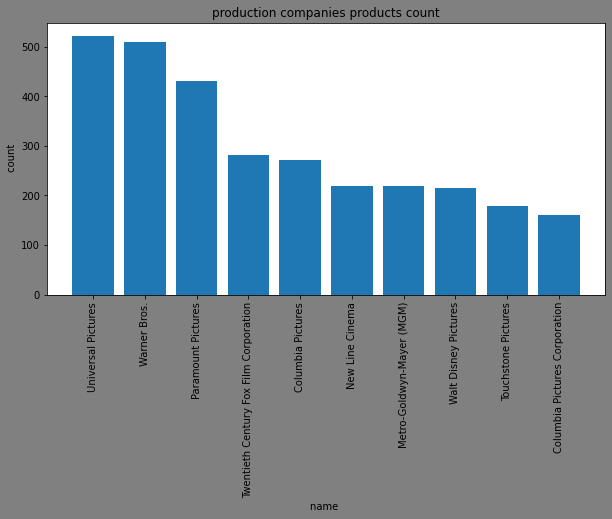

In [7]:
# top 10 productive countries

production_companies_list=list(df['production_companies'])
production_companies_count=cleaning_some_columns(production_companies_list)
res = dict(itertools.islice(production_companies_count.items(),1,11))
fig,axes=plt.subplots(figsize=(10,5))   
fig.patch.set_facecolor('grey')
axes.bar(res.keys(),res.values())
axes.set_title('production companies products count')
axes.set_xlabel('name ')
axes.set_ylabel(' count')
plt.xticks(rotation ='vertical')

The top company is 'universal comics'

###  budget to revenue ot the top company who produced the max count of movies

budget     1317633695
revenue    3792411919
dtype: int64


Text(0.5, 1.0, 'all budget and revenue')

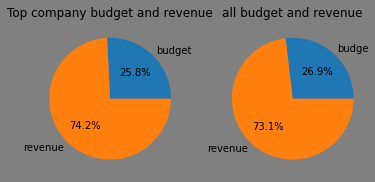

In [8]:
#seeing the top movie maker budget to revenue ratio
Top_company=df[df['production_companies']=='Universal Pictures']
Top_company=Top_company[['budget','revenue']].sum()
print(Top_company)
all_companies=[df['budget'].sum() ,df['revenue'].sum()]

fig,axes=plt.subplots(1,2)
fig.patch.set_facecolor('grey')
axes[0].pie(Top_company,labels=Top_company.index ,autopct='%1.1f%%')
axes[0].set_title('Top company budget and revenue')
axes[1].pie(all_companies,labels=['budge','revenue'] ,autopct='%1.1f%%')
axes[1].set_title('all budget and revenue')

the movie making industry is really skyrocketting as th the budget is 1/4 of the revenue

## Genres count

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

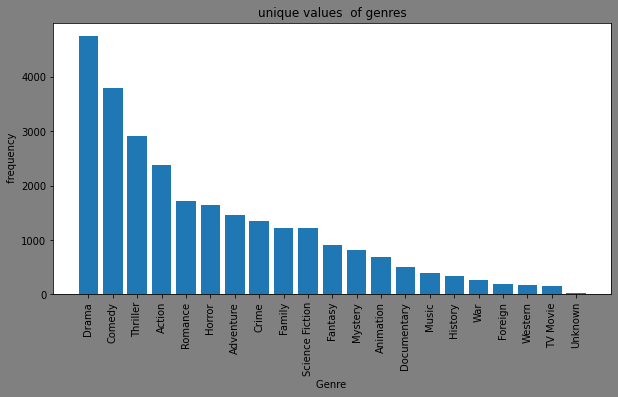

In [9]:
#countgenres
genres_list=list(df['genres'])
genres_count=cleaning_some_columns(genres_list)
fig,axes=plt.subplots(figsize=(10,5))   
fig.patch.set_facecolor('grey')
axes.bar(genres_count.keys(),genres_count.values())
axes.set_title('unique values  of genres')
axes.set_xlabel('Genre ')
axes.set_ylabel(' frequency')
plt.xticks(rotation ='vertical')


The most used genres are drama then comedy

<a id='conclusions'></a>
## Conclusions

-As we saw from the statistics and the charts that the budget is 1/4 of the revenue, that means that movie making business is skyrocketing .

-there is no relationship between the increase of budget and(revenue ,runtime ,popularityor votes) as the charts show.

-The top movie making company is "Univeral picture"

-the most budget was relocated for the movie ''The Warrior's Way''   but the most popularity is for "jurassic world" and the most vote count wa for 
"inception" and the most revenue was for "avatar"


## LIMITATIONS :
-The count for the movies in the TMDB rating is about 12000 doen't represent the count of all the movies arount the world that is apprximately 265000 

-there were alot of missing values in the production companies so it may not represent the real count for the companies 


-we can get more movies information from other websites like rotten tomatoes,...etc

